In [44]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [45]:
import pandas as pd
import numpy as np

In [46]:
data = pd.read_csv('advertising.csv',
                   names=['TimeSpent', 'Age', 'AreaIncome', 
                          'DailyInternetUsage', 'AdHeadline', 
                          'City', 'Male', 'Country', 'Timestamp', 
                          'Clicked'],
                   header=1)

https://www.kaggle.com/fayomi/advertising
Feature	Description
1. Daily Time Spent - on a Site	Time spent by the user on a site in minutes.
2. Age -	Customer's age in terms of years.
3. Area Income -	Average income of geographical area of consumer.
4. Daily Internet Usage-	Avgerage minutes in a day consumer is on the internet.
5. Ad Topic Line-	Headline of the advertisement.
6. City-	City of the consumer.
7. Male-	Whether or not a consumer was male.
8. Country-	Country of the consumer.
9. Timestamp-	Time at which user clicked on an Ad or the closed window.
10. Clicked on Ad-	0 or 1 is indicated clicking on an Ad.

In [47]:
data.head(10)

,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Timestamp,Clicked
0,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
1,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,?,1,Italy,2016-01-10 02:31:19,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.0,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [48]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TimeSpent           1010 non-null   object 
 1   Age                 1010 non-null   object 
 2   AreaIncome          1010 non-null   float64
 3   DailyInternetUsage  1010 non-null   float64
 4   AdHeadline          1010 non-null   object 
 5   City                1010 non-null   object 
 6   Male                1010 non-null   int64  
 7   Country             1010 non-null   object 
 8   Timestamp           1010 non-null   object 
 9   Clicked             1010 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 79.0+ KB


#### check for duplicate records

In [49]:
data[data.duplicated() == True]

,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Timestamp,Clicked
23,77.22,30,64802.33,224.44,Object-based reciprocal knowledgebase,Port Jacqueline,1,Cameroon,2016-01-05 07:52:48,0
35,67.64,35,51473.28,267.01,Programmable asymmetric data-warehouse,Phelpschester,1,Peru,2016-07-02 20:23:15,0
238,40.42,45,40183.75,133.90,Stand-alone reciprocal synergy,Lisamouth,1,Norway,2016-03-16 07:59:37,1
496,50.19,40,33987.27,117.30,Progressive uniform budgetary management,Lake Stephenborough,0,Thailand,2016-03-25 19:02:35,1


In [50]:
data.duplicated().sum()

4

In [51]:
data.drop_duplicates(inplace=True)

data[data.duplicated() == True]

,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Timestamp,Clicked


In [52]:
data[data['TimeSpent'] == '?']

,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Timestamp,Clicked
908,?,43,53647.81,121.28,Monitored homogeneous artificial intelligence,Robertfurt,0,Macao,2016-06-26 02:34:15,1


In [53]:
data.loc[908]

TimeSpent                                                         ?
Age                                                              43
AreaIncome                                                 53647.81
DailyInternetUsage                                           121.28
AdHeadline            Monitored homogeneous artificial intelligence
City                                                     Robertfurt
Male                                                              0
Country                                                       Macao
Timestamp                                       2016-06-26 02:34:15
Clicked                                                           1
Name: 908, dtype: object

#### check for null values

In [54]:
data.replace('?', np.nan, inplace=True)

In [55]:
data['TimeSpent'] = pd.to_numeric(data['TimeSpent'])

data['Age'] = pd.to_numeric(data['Age'])

In [56]:
data.isnull().sum()

TimeSpent             1
Age                   2
AreaIncome            0
DailyInternetUsage    0
AdHeadline            2
City                  2
Male                  0
Country               0
Timestamp             0
Clicked               0
dtype: int64

In [57]:
data['Age'] = data['Age'].fillna(data['Age'].median())

data.isnull().sum()

TimeSpent             1
Age                   0
AreaIncome            0
DailyInternetUsage    0
AdHeadline            2
City                  2
Male                  0
Country               0
Timestamp             0
Clicked               0
dtype: int64

In [58]:
data['TimeSpent'] = data['TimeSpent'].fillna(data['TimeSpent'].mean())

data.isnull().sum()

TimeSpent             0
Age                   0
AreaIncome            0
DailyInternetUsage    0
AdHeadline            2
City                  2
Male                  0
Country               0
Timestamp             0
Clicked               0
dtype: int64

In [59]:
data.dropna(inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 0 to 1009
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TimeSpent           1002 non-null   float64
 1   Age                 1002 non-null   float64
 2   AreaIncome          1002 non-null   float64
 3   DailyInternetUsage  1002 non-null   float64
 4   AdHeadline          1002 non-null   object 
 5   City                1002 non-null   object 
 6   Male                1002 non-null   int64  
 7   Country             1002 non-null   object 
 8   Timestamp           1002 non-null   object 
 9   Clicked             1002 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 86.1+ KB


In [61]:
data.to_csv('advertising_cleaned.csv', index=False)

#### summarizing numerical columns in the dataset

As the mean and median(50% percentile) are very similar to each other which indicates that our data is not skewed and we do not require any data transformations.We shall confirm this by visualizing as well.

In [62]:
numeric = ['TimeSpent',
           'Age', 'AreaIncome',
           'DailyInternetUsage' ]

In [63]:
data[numeric].describe()

,TimeSpent,Age,AreaIncome,DailyInternetUsage
count,1002.000000,1002.000000,1002.000000,1002.000000
mean,64.974230,36.014970,55005.569910,179.763423
std,15.845378,8.779618,13405.677543,43.891491
min,32.600000,19.000000,13996.500000,104.780000
25%,51.320000,29.000000,47073.067500,138.582500
50%,68.105000,35.000000,56998.245000,182.650000
75%,78.537500,42.000000,65488.065000,218.580000
max,91.430000,61.000000,79484.800000,269.960000


#### Summarizing Categorical columns

In [64]:
categorical = ['AdHeadline', 'City',
               'Male', 'Country', 'Clicked']

In [65]:
data[categorical].describe(include = ['O'])

,AdHeadline,City,Country
count,1002,1002,1002
unique,999,969,237
top,Grass-roots cohesive monitoring,Robertfurt,Czech Republic
freq,2,3,9


As we have many different cities (Unique) and also not many people belonging to a same city(freq). So, it probably means that this feature is having no or very less predictive power. 

#### Analysing the country variable

In [66]:
pd.crosstab(data['Country'],
            data['Clicked']).sort_values(1,ascending = False).head(15)

Clicked,0,1
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


It seems that users are from all over the world with maximum from france and czech republic with a count of 9 each.

In [67]:
pd.crosstab(index = data['Country'],
            columns = 'count').sort_values(['count'], ascending = False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


#### Converting timestamp column into datatime object in order to extract new features

In [68]:
data['Timestamp'] = pd.to_datetime(data['Timestamp']) 

data['Month'] = data['Timestamp'].dt.month

data['Day'] = data['Timestamp'].dt.day

data['Hour'] = data['Timestamp'].dt.hour 

Creates a new column called Weekday with sunday as 6 and monday as 0

In [69]:
data["Weekday"] = data['Timestamp'].dt.dayofweek 

we will drop the timestamp column as we have indvidually extracted the required features from it

In [70]:
data = data.drop(['Timestamp'], axis=1)

In [71]:
data.head()

,TimeSpent,Age,AreaIncome,DailyInternetUsage,AdHeadline,City,Male,Country,Clicked,Month,Day,Hour,Weekday
0,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,0,5,19,14,3


## Visualizations

#### Matplotlib

pip uninstall matplotlib && pip install matplotlib==3.0.0 otherwise heatmap in seaborn is not coming properply 

In [72]:
!pip install matplotlib
import matplotlib.pyplot as plt

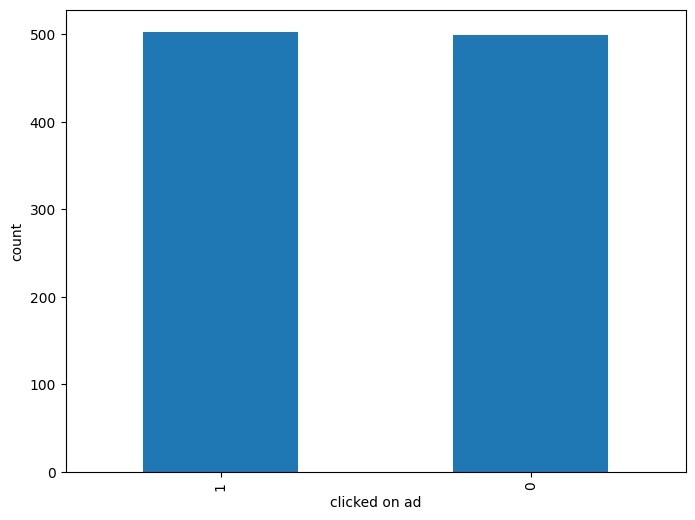

In [73]:
data['Clicked'].value_counts().plot(kind = 'bar', figsize=(8,6))

plt.xlabel('clicked on ad')
plt.ylabel('count')


plt.show()

there is data across 7 months , 2nd month seems to have highest number of clicks

<Axes: xlabel='Month'>

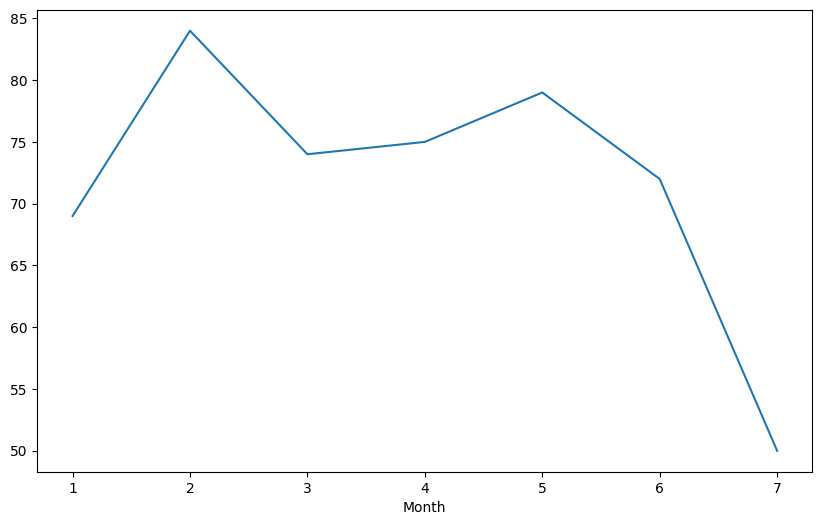

In [74]:
monthly_data = data.groupby(['Month'])['Clicked'].sum()

monthly_data.plot(figsize=(10, 6))

Line chart here indicates that user tends to click on a Ad later in a day or probably early in the morning.
Also sunday seems to be effective for clicking on a ad from the bar chart.

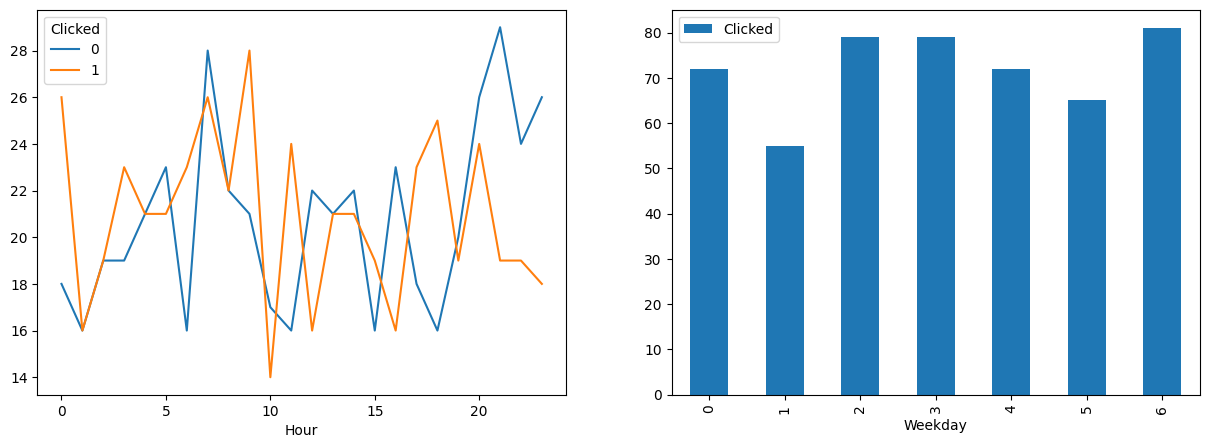

In [75]:
f, ax = plt.subplots(1, 2, figsize = (15,5))

pd.crosstab(data["Clicked"], data["Hour"]).T.plot(ax = ax[0])

pd.pivot_table(data, index = ['Weekday'],
               values = ['Clicked'],
               aggfunc = np.sum).plot(kind = 'bar', ax = ax[1])


plt.show()

#### Seaborn

In [76]:
!pip install seaborn --upgrade

In [77]:
import seaborn as sns

people between the age 20 to 40 spend more time on the site daily

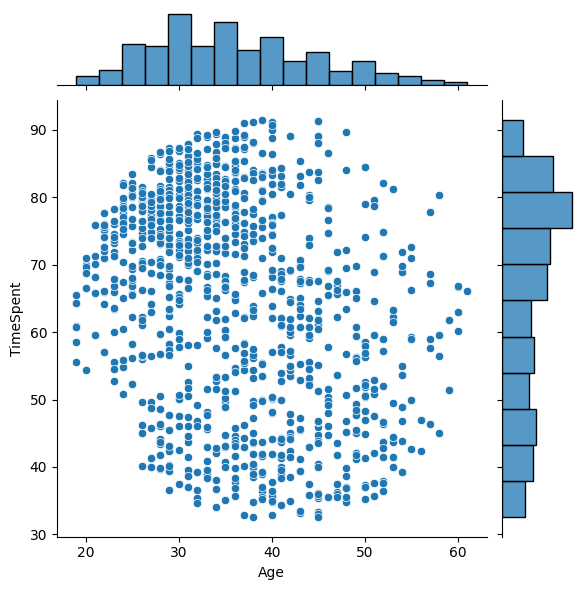

In [78]:
sns.jointplot(x = "Age",
              y = "TimeSpent",
              data = data) 

We can clearly see that daily internet usage and daily time spent on a site has 2 peaks

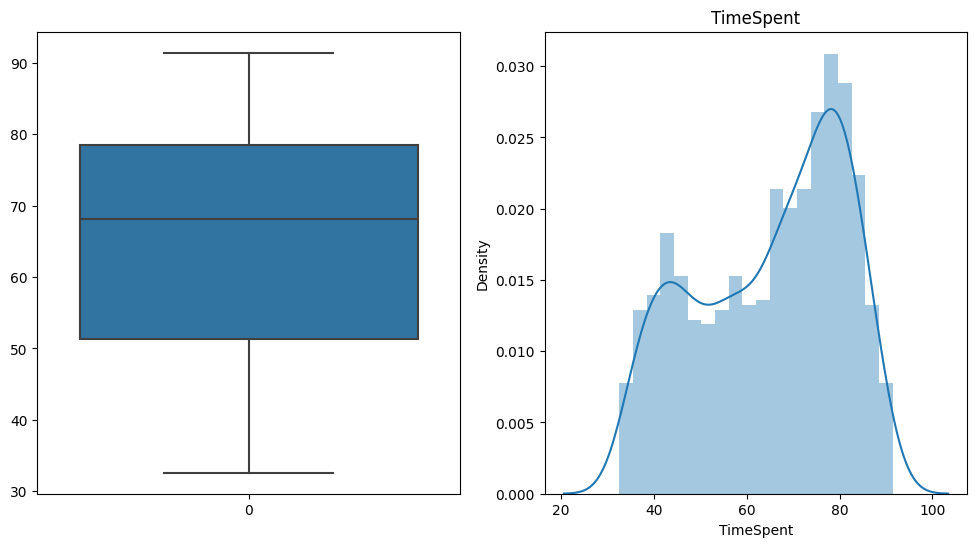

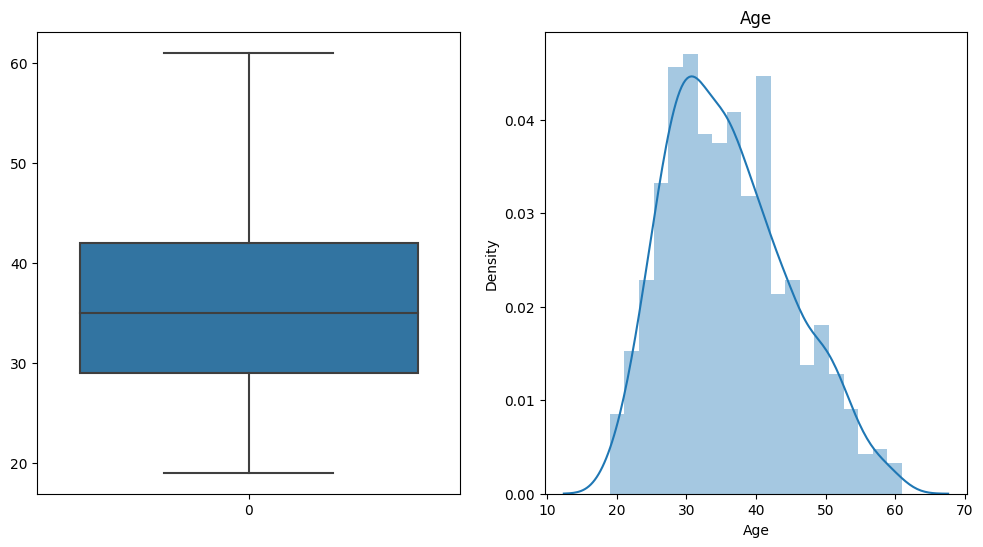

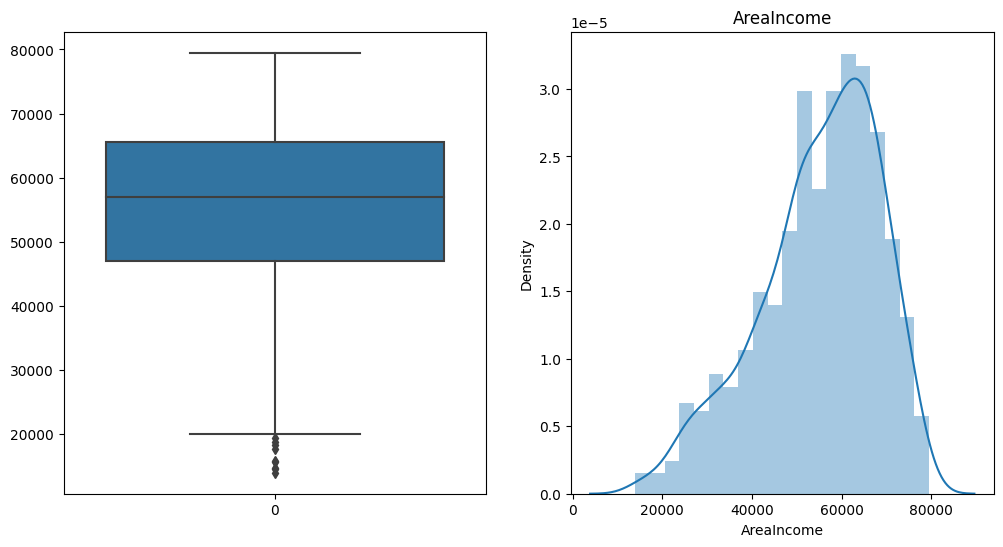

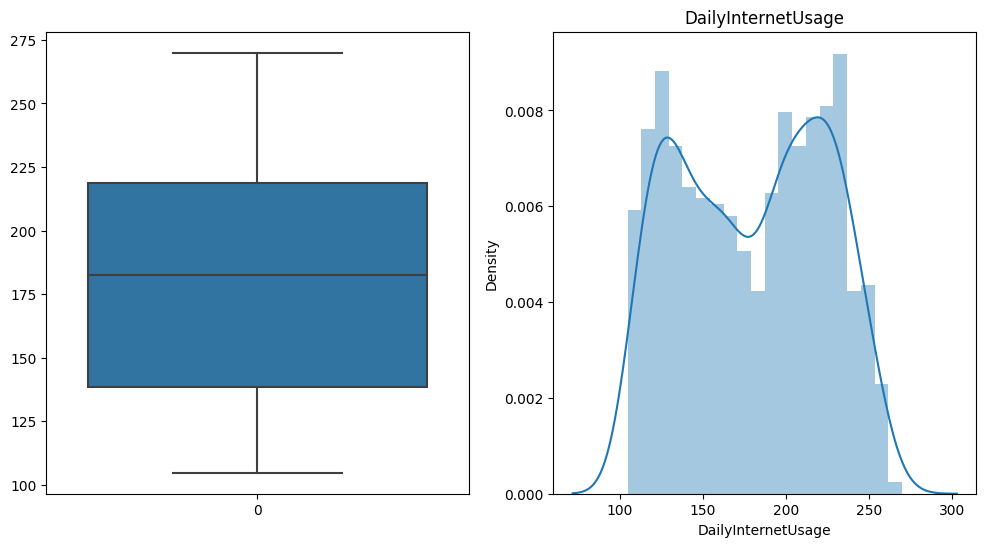

In [79]:
plots = ['TimeSpent', 'Age', 'AreaIncome','DailyInternetUsage']


for i in plots:
    plt.figure(figsize = (12, 6))
    plt.subplot(1,2,1)
    
    sns.boxplot(data[i], orient='v')
    plt.subplot(1,2,2)
    
    sns.distplot(data[i],bins= 20)    
    plt.title(i)    
    plt.show()

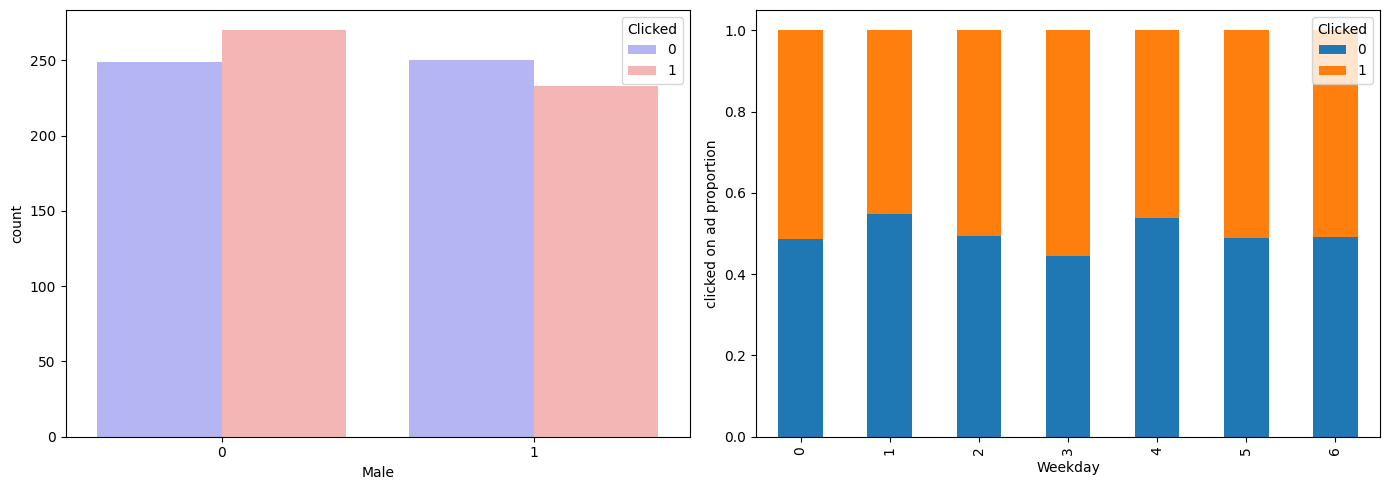

In [80]:
f,ax = plt.subplots(1,2, figsize=(14,5))

sns.countplot(x = 'Male',
              hue = 'Clicked',
              data = data,
              palette = 'bwr',
              ax = ax[0]) 

table = pd.crosstab(data['Weekday'], data['Clicked'])

table.div(table.sum(1).astype(float), axis=0).plot(kind = 'bar',
                                                   stacked = True,
                                                   ax = ax[1],
                                                   grid  =False)


ax[1].set_ylabel('clicked on ad proportion')
ax[1].set_xlabel('Weekday')
plt.tight_layout()
plt.show()

We expect daily internet usage and daily time spent on site to be more correlated with our target variable. Also, none of our explantory variables seems to correlate with each other which indicates there is no collinearity in our data.

#### Plotly Charts

In [81]:
!pip install plotly

In [82]:
!pip install chart_studio 

In [83]:
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go



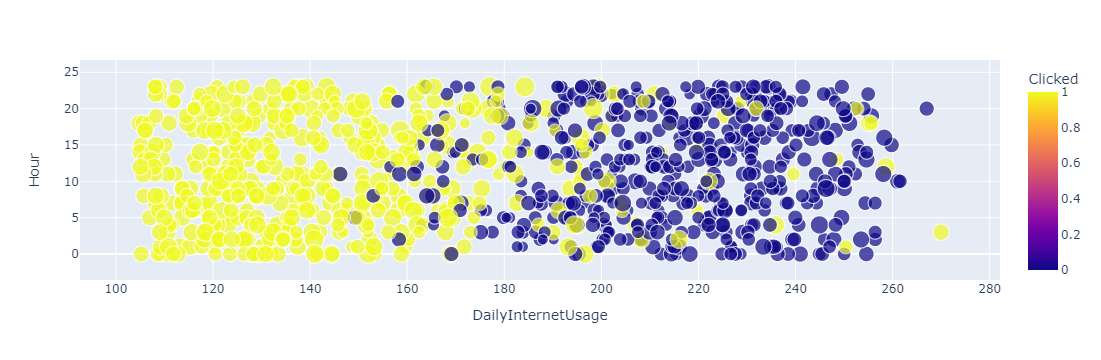

In [84]:
import plotly.express as px

fig = px.scatter(data, x = "DailyInternetUsage", y = "Hour",
                 color = "Clicked", size = 'Age')

fig.show()

In [85]:
fig = go.Figure()

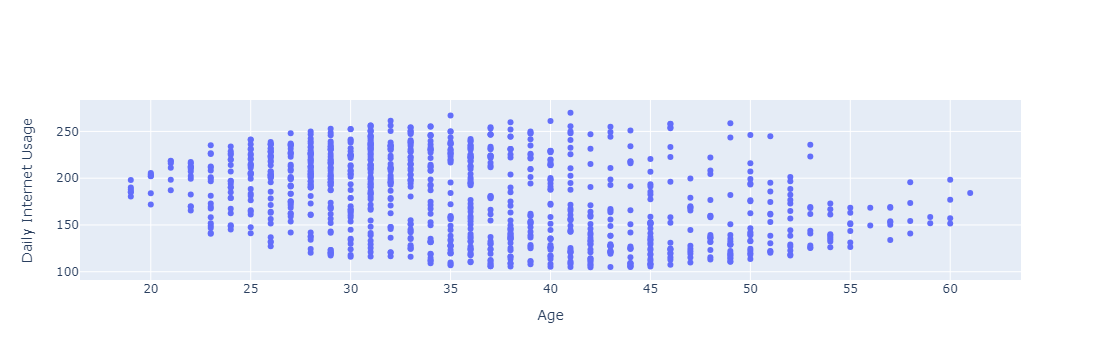

In [86]:
fig.add_trace(go.Scatter(x = data["Age"],
                         y = data['DailyInternetUsage'],  
                         mode = 'markers'))

fig.update_xaxes(title_text = 'Age')
fig.update_yaxes(title_text = 'Daily Internet Usage')